In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from itertools import combinations

In [6]:
import pandas as pd

In [ ]:
from utils import generate_dummy_grades, sum_columns

In [ ]:
# simulate reading the grades from somewhere
# right now we're just using dammy data
num_exams=100
num_questions=28
raw_grades = generate_dummy_grades(num_exams, num_questions)
    

In [ ]:
import ipywidgets as widgets
import pandas as pd
from IPython.display import display
from io import StringIO

# Read the grades from a csv file

# Create the file upload widget.
upload_widget = widgets.FileUpload(
    accept=".csv",       # Accept only CSV files.
    multiple=False,      # Only allow one file to be uploaded.
    description="Upload CSV File"
)

raw_grades = []

def on_upload_change(change):
    # When a file is uploaded, process its content.
    if upload_widget.value:
        for filename, file_info in upload_widget.value.items():
            content = file_info['content']
            try:
                text = content.decode('utf-8')
            except UnicodeDecodeError:
                text = content.decode('latin1')
            # Read CSV content into a DataFrame.
            df = pd.read_csv(StringIO(text))
            # Convert the DataFrame into a list of lists.
            global raw_grades
            raw_grades = df.values.tolist()
            print(f"Loaded {len(raw_grades)} exams from '{filename}'.")

# Observe changes on the upload widget.
upload_widget.observe(on_upload_change, names='value')
display(upload_widget)


In [ ]:

# Use dummy grades

dummy_num_exams=100
dummy_num_questions=28
raw_grades = generate_dummy_grades(dummy_num_exams, dummy_num_questions)
    

NameError: name 'generate_dummy_grades' is not defined

In [ ]:
# calculate de score for each exam
# and make a list of exams sorted by score
from collections import defaultdict
from models import Exam

exams_by_score = defaultdict(list)
sorted_exams = []


for questions in raw_grades:
    exam = Exam(sum(questions), questions)
    sorted_exams.append(exam) # unsorted for now
    exams_by_score[sum(questions)].append(questions)
    
# actually sort them
sorted_exams.sort(key=lambda x: x.score, reverse=True)

SyntaxError: invalid syntax (2153524598.py, line 4)

In [8]:
# Calculate Terciles
from math import floor, ceil
from models import Tercile
high_bound = floor(len(sorted_exams) / 3)
low_bound = ceil(2 * len(sorted_exams) / 3)

high_stats = Tercile('high', sorted_exams[:high_bound])
medium_stats = Tercile('medium', sorted_exams[high_bound:low_bound])
low_stats = Tercile('low', sorted_exams[low_bound:])


ModuleNotFoundError: No module named 'models'

In [ ]:
print(high_stats)
print(medium_stats)
print(low_stats)

In [ ]:
# generate the base for the terciles - High
high_base = []
print(high_stats)
for score in range(high_stats.high, high_stats.low, -1):
    print(f"adding score {score} to high_base")
    for questions in exams_by_score[score]:
        high_base.append(questions)
print(high_base)
print(len(high_base))

In [ ]:
# generate the base for the terciles - Medium
# we don't actually need the medium base
# medium_base = []
# print(medium_stats)
# for score in range(medium_stats.high-1, medium_stats.low, -1):
#     print(f"adding score {score} to medium_base")
#     for questions in exams_by_score[score]:
#         medium_base.append(questions)
# print(medium_base)
# print(len(medium_base))

In [ ]:
# generate the base for the terciles - Low
low_base = []
print(low_stats)
for score in range(low_stats.high-1, low_stats.low-1, -1):
    print(f"adding score {score} to low_base")
    for questions in exams_by_score[score]:
        low_base.append(questions)
print(low_base)
print(len(low_base))

In [ ]:
# calculate all the possible high questions scores
# find how many elements are missing from high base
r = high_stats.size - len(high_base)
if r == 0:
    print("high_base is full? no missing elements")
elif r < 0:
    print("error, high_base is bigger than expected")

print(f"high is missing {r} elements of value {high_stats.low}")
print(f"this means we need to all combinations of {r} of {len(exams_by_score[high_stats.low])}")
high_combos = list(combinations(exams_by_score[high_stats.low],r))
print(f"found {len(high_combos)} ways of completing high")
questions_high_scores = []
for c in high_combos:
    questions_high_scores.append(sum_columns(high_base+list(c)))

In [ ]:
# calculate all the possible low questions scores terciles
# find how many elements are missing from low base
r = low_stats.size - len(low_base)
if r == 0:
    print("low_base is full? no missing elements")
elif r < 0:
    print("error, low_base is bigger than expected")

print(f"low is missing {r} elements of value {low_stats.high}")
print(f"this means we need to all combinations of {r} of {len(exams_by_score[low_stats.high])}")
low_combos = list(combinations(exams_by_score[low_stats.high],r))
print(f"found {len(low_combos)} ways of completing low")
questions_low_scores = []
for c in low_combos:
    questions_low_scores.append(sum_columns(low_base+list(c)))	

In [256]:
# Visualize the distribution of question score in high and low

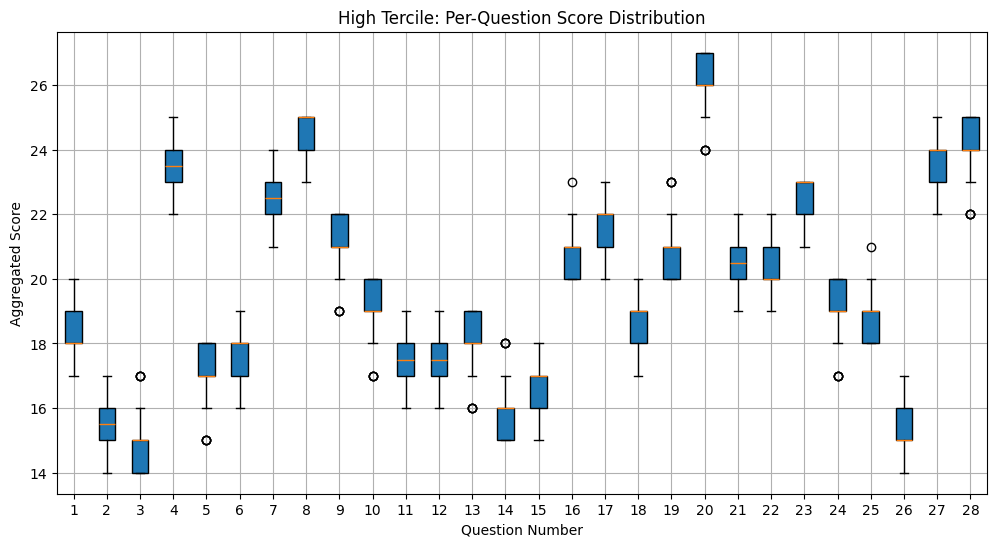

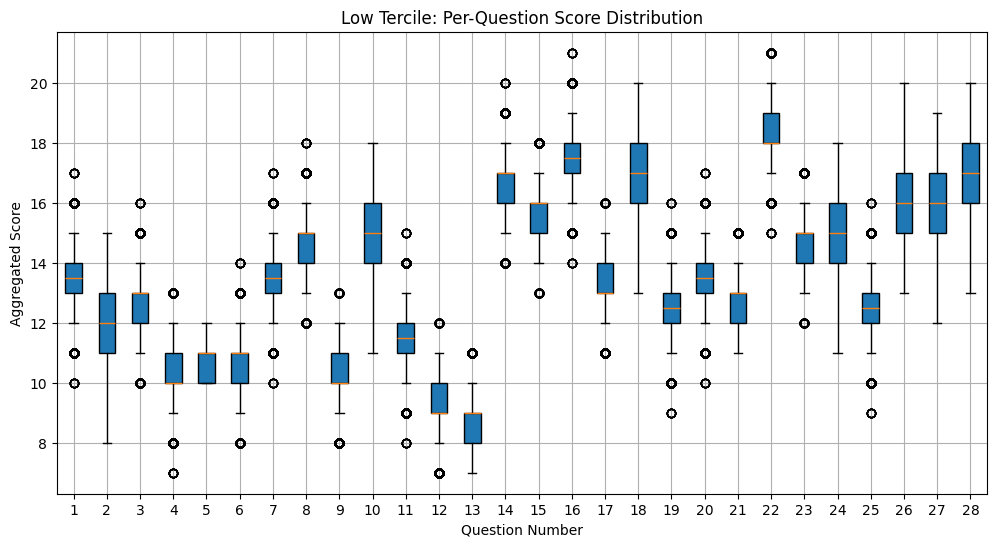

In [257]:
# %% [markdown]
# ## Graph: Distribution of Question Scores for Tercile Completions
#
# In the cells below, we plot boxplots of the per-question score distributions derived
# from the high and low tercile completions. Each box represents the aggregated score distribution
# for a given question across all the combinations used to complete the tercile.

# %%
import matplotlib.pyplot as plt

# Plot for high tercile combinations
if questions_high_scores:
    # Transpose the list so each inner list contains scores for one question
    high_scores_by_question = list(zip(*questions_high_scores))
    plt.figure(figsize=(12, 6))
    plt.boxplot(high_scores_by_question, patch_artist=True)
    plt.title("High Tercile: Per-Question Score Distribution")
    plt.xlabel("Question Number")
    plt.ylabel("Aggregated Score")
    plt.xticks(range(1, len(high_scores_by_question) + 1), range(1, len(high_scores_by_question) + 1))
    plt.grid(True)
    plt.show()
else:
    print("No high tercile combination data available.")

# Plot for low tercile combinations
if questions_low_scores:
    low_scores_by_question = list(zip(*questions_low_scores))
    plt.figure(figsize=(12, 6))
    plt.boxplot(low_scores_by_question, patch_artist=True)
    plt.title("Low Tercile: Per-Question Score Distribution")
    plt.xlabel("Question Number")
    plt.ylabel("Aggregated Score")
    plt.xticks(range(1, len(low_scores_by_question) + 1), range(1, len(low_scores_by_question) + 1))
    plt.grid(True)
    plt.show()
else:
    print("No low tercile combination data available.")



In [242]:
import pandas as pd
import base64
from IPython.display import HTML, display

def create_download_button(df: pd.DataFrame, filename: str = "data.csv", button_text: str = "Download CSV"):
    """
    Create a download button in a Jupyter Notebook that lets the user download a DataFrame as a CSV file.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to download.
        filename (str): The name of the downloaded CSV file.
        button_text (str): The text to display on the download button.
    """
    # Convert the DataFrame to CSV.
    csv_str = df.to_csv(index=False)
    # Encode the CSV string to base64.
    b64 = base64.b64encode(csv_str.encode()).decode()
    # Create a data URL.
    payload = f"data:text/csv;base64,{b64}"
    # Create the HTML for the download link.
    html_button = f'<a download="{filename}" href="{payload}" target="_blank"><button>{button_text}</button></a>'
    display(HTML(html_button))

# Example usage for high tercile combinations:
if questions_high_scores:
    # Assume each inner list in questions_high_scores represents per-question aggregated scores.
    # Create a DataFrame. Adjust the column names if needed.
    df_high = pd.DataFrame(questions_high_scores, columns=[f"Q{i+1}" for i in range(len(questions_high_scores[0]))])
    create_download_button(df_high, filename="high_tercile.csv", button_text="Download High Tercile CSV")
else:
    print("No high tercile combination data available.")

# Example usage for low tercile combinations:
if questions_low_scores:
    df_low = pd.DataFrame(questions_low_scores, columns=[f"Q{i+1}" for i in range(len(questions_low_scores[0]))])
    create_download_button(df_low, filename="low_tercile.csv", button_text="Download Low Tercile CSV")
else:
    print("No low tercile combination data available.")
